In [1]:
!pip install --upgrade xlrd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Data

In [3]:
rain_data = pd.read_excel('/content/drive/MyDrive/ME789/Rainfall Data India.xls')
display(rain_data)

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,ANDAMAN & NICOBAR ISLANDS,1901-2015,Mean,49.2,27.6,30.0,72.2,355.6,471.4,397.5,400.5,431.3,289.5,233.0,153.3,2911.0,76.8,457.8,1700.7,675.8
1,ANDAMAN & NICOBAR ISLANDS,1901-2015,Standard deviation,71.3,38.8,43.6,66.8,151.2,147.0,151.9,142.6,146.7,99.4,119.4,129.5,395.9,81.1,176.8,286.3,199.0
2,ANDAMAN & NICOBAR ISLANDS,1901-2015,Coefficient of variation,144.9,140.4,145.5,92.5,42.5,31.2,38.2,35.6,34.0,34.3,51.2,84.5,13.6,105.6,38.6,16.8,29.4
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
4,ANDAMAN & NICOBAR ISLANDS,1901,Percentage departure,-0.1,215.9,-2.6,-96.8,48.7,9.8,-8.2,20.1,-22.9,34.2,139.5,-78.1,15.9,77.5,22.4,-0.3,45.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12451,WEST UTTAR PRADESH,2014,Percentage departure,177.6,66.4,103.9,-14.0,-11.2,-71.4,-39.1,-68.2,-43.5,-50.3,-100.0,127.5,-41.8,121.6,31.2,-53.5,-24.0
12452,WEST UTTAR PRADESH,2014,No. of districts,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN
12453,WEST UTTAR PRADESH,2015,Actual,31.6,7.2,66.8,21.0,8.1,72.0,194.2,143.5,26.5,6.9,2.0,3.0,582.7,38.8,95.9,436.1,11.9
12454,WEST UTTAR PRADESH,2015,Percentage departure,81.6,-59.4,501.7,238.5,-34.9,-6.4,-22.1,-43.7,-82.3,-76.3,-52.0,-57.7,-30.3,10.6,222.7,-40.3,-70.6


In [4]:
actual_data = rain_data[rain_data['Parameter']=='Actual']
display(actual_data)

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
6,ANDAMAN & NICOBAR ISLANDS,1902,Actual,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
9,ANDAMAN & NICOBAR ISLANDS,1903,Actual,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
12,ANDAMAN & NICOBAR ISLANDS,1904,Actual,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
15,ANDAMAN & NICOBAR ISLANDS,1905,Actual,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12441,WEST UTTAR PRADESH,2011,Actual,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5,777.4,12.5,36.3,725.9,2.7
12444,WEST UTTAR PRADESH,2012,Actual,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0,389.6,14.5,6.4,366.0,2.7
12447,WEST UTTAR PRADESH,2013,Actual,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9,932.8,89.9,7.2,763.8,71.8
12450,WEST UTTAR PRADESH,2014,Actual,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3,486.9,77.7,39.0,339.4,30.8


In [5]:
monthly_data = actual_data.drop(columns=['Parameter','ANNUAL','JF','MAM','JJAS','OND'])
display(monthly_data)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
6,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
9,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
12,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
15,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12441,WEST UTTAR PRADESH,2011,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5
12444,WEST UTTAR PRADESH,2012,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0
12447,WEST UTTAR PRADESH,2013,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9
12450,WEST UTTAR PRADESH,2014,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3


In [6]:
india_data = monthly_data.groupby('YEAR').sum()
display(india_data)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,1232.7,1417.8,738.4,1623.6,2465.2,6811.3,10192.3,10546.4,4695.4,2579.4,2266.5,378.3
1902,298.2,290.7,733.3,1602.0,2521.4,5908.7,12290.1,8393.0,9051.4,3035.0,1521.0,1160.3
1903,589.8,502.0,930.2,594.1,2808.3,6019.6,12673.8,10481.9,7581.7,4387.1,1649.8,758.6
1904,409.4,328.7,1010.8,1449.1,3235.9,8312.0,10919.0,7595.5,5859.1,2959.3,691.5,517.0
1905,812.0,716.7,1432.9,1216.4,2675.3,5768.2,10091.0,8637.3,6274.1,2735.9,560.9,595.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,516.3,819.7,998.8,1775.7,2576.2,8679.7,11329.6,11858.1,8128.4,1923.3,1074.9,465.5
2012,962.0,347.9,428.1,2096.7,1808.8,6599.1,10632.5,10674.2,8453.1,2758.6,1395.2,487.4
2013,435.9,1316.3,629.2,1137.6,2980.9,10707.1,13412.4,9516.2,6452.9,5213.3,986.1,317.5


In [7]:
df = india_data.stack().reset_index()
display(df)

,YEAR,level_1,0
0,1901,JAN,1232.7
1,1901,FEB,1417.8
2,1901,MAR,738.4
3,1901,APR,1623.6
4,1901,MAY,2465.2
...,...,...,...
1375,2015,AUG,8485.7
1376,2015,SEP,5690.2
1377,2015,OCT,2204.3
1378,2015,NOV,2000.4


In [8]:
df.columns = ['Year','Month','Rainfall']
display(df)

,Year,Month,Rainfall
0,1901,JAN,1232.7
1,1901,FEB,1417.8
2,1901,MAR,738.4
3,1901,APR,1623.6
4,1901,MAY,2465.2
...,...,...,...
1375,2015,AUG,8485.7
1376,2015,SEP,5690.2
1377,2015,OCT,2204.3
1378,2015,NOV,2000.4


In [9]:
df['Month-Year'] = df['Month'].map(str) + '-' + df['Year'].map(str)
monthly_time_series_data = df[['Month-Year','Rainfall']]
display(monthly_time_series_data)

,Month-Year,Rainfall
0,JAN-1901,1232.7
1,FEB-1901,1417.8
2,MAR-1901,738.4
3,APR-1901,1623.6
4,MAY-1901,2465.2
...,...,...
1375,AUG-2015,8485.7
1376,SEP-2015,5690.2
1377,OCT-2015,2204.3
1378,NOV-2015,2000.4


In [10]:
tsdf = monthly_time_series_data.set_index('Month-Year')
display(tsdf)

,Rainfall
Month-Year,
JAN-1901,1232.7
FEB-1901,1417.8
MAR-1901,738.4
APR-1901,1623.6
MAY-1901,2465.2
...,...
AUG-2015,8485.7
SEP-2015,5690.2
OCT-2015,2204.3


[Text(0, 0.5, 'Amount of Rainfall in mm'), Text(0.5, 0, 'Month')]

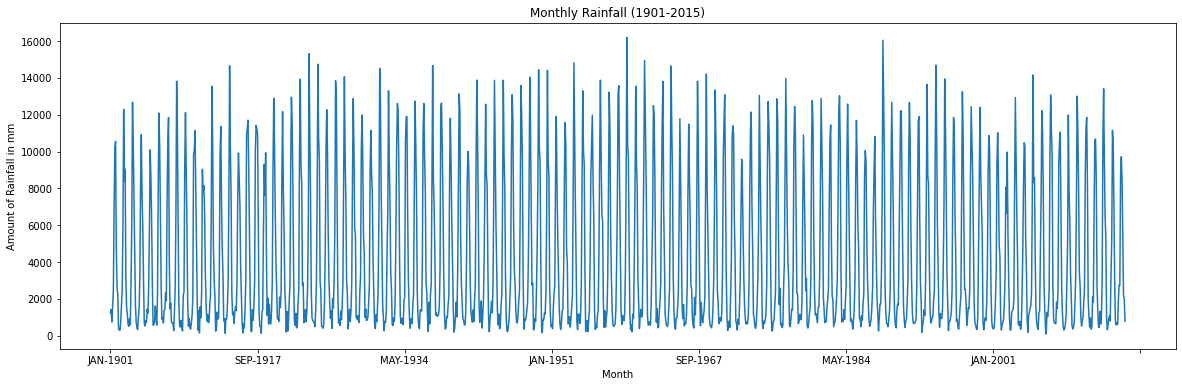

In [11]:
ax = tsdf['Rainfall'].plot(figsize=(20,6),title='Monthly Rainfall (1901-2015)')
ax.set(xlabel='Month',ylabel='Amount of Rainfall in mm')

In [12]:
tsdf['Month'] = pd.to_datetime(monthly_time_series_data['Month-Year']).to_list()
data = tsdf.set_index('Month')
display(data)

,Rainfall
Month,
1901-01-01,1232.7
1901-02-01,1417.8
1901-03-01,738.4
1901-04-01,1623.6
1901-05-01,2465.2
...,...
2015-08-01,8485.7
2015-09-01,5690.2
2015-10-01,2204.3


In [13]:
train_data = data[:1000]
test_data = data[1000:]

In [14]:
scaler = MinMaxScaler()
scaler.fit(train_data)
sc_train_data = scaler.transform(train_data)
sc_test_data = scaler.transform(test_data)

###LSTM

In [15]:
no_of_consecutive_months_as_input = 12
generator = TimeseriesGenerator(sc_train_data, sc_train_data, length = no_of_consecutive_months_as_input, batch_size = 1)

In [16]:
lstm_model = Sequential()
no_of_units_in_LSTM_layer = 64
lstm_model.add(LSTM(no_of_units_in_LSTM_layer, activation='relu', input_shape=(no_of_consecutive_months_as_input, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


988/988 [==============================] - 9s 8ms/step - loss: 0.0311
Epoch 2/10
988/988 [==============================] - 10s 11ms/step - loss: 0.0086
Epoch 3/10
988/988 [==============================] - 6s 6ms/step - loss: 0.0067
Epoch 4/10
988/988 [==============================] - 6s 6ms/step - loss: 0.0067
Epoch 5/10
988/988 [==============================] - 6s 6ms/step - loss: 0.0064
Epoch 6/10
988/988 [==============================] - 6s 6ms/step - loss: 0.0062
Epoch 7/10
988/988 [==============================] - 6s 6ms/step - loss: 0.0058
Epoch 8/10
988/988 [==============================] - 6s 6ms/step - loss: 0.0055
Epoch 9/10
988/988 [==============================] - 8s 8ms/step - loss: 0.0052
Epoch 10/10
988/988 [==============================] - 6s 6ms/step - loss: 0.0052


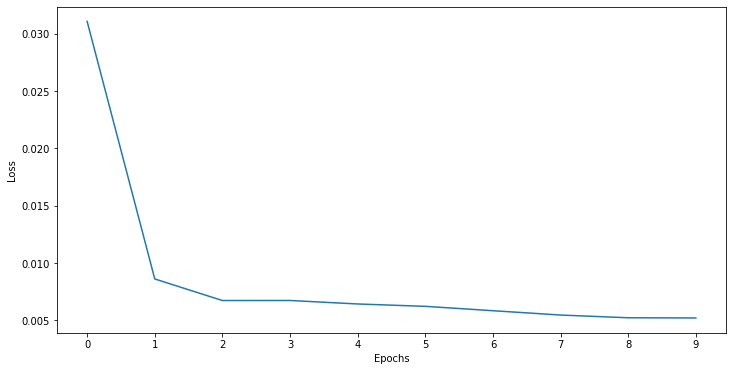

In [17]:
history = lstm_model.fit_generator(generator,epochs=10)
lstm_losses = history.history['loss']
plt.figure(figsize=(12,6))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(1,11,1))
plt.plot(range(len(lstm_losses)),lstm_losses);

In [18]:
output_generator = TimeseriesGenerator(sc_test_data, sc_test_data, length = no_of_consecutive_months_as_input, batch_size = 1)
sc_predictions = lstm_model.predict_generator(output_generator)
predictions = scaler.inverse_transform(sc_predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [19]:
actual_data = test_data[12:]
actual_data.columns = ['Actual']
predict_data = pd.DataFrame(predictions,index = actual_data.index,columns = ['Predicted'])
data_table = pd.concat([actual_data, predict_data], axis=1)
display(data_table)

,Actual,Predicted
Month,,
1985-05-01,2991.0,2896.984619
1985-06-01,8511.4,8913.999023
1985-07-01,11690.7,12672.607422
1985-08-01,9493.8,10789.334961
1985-09-01,5999.6,6737.270996
...,...,...
2015-08-01,8485.7,9885.413086
2015-09-01,5690.2,5952.244629
2015-10-01,2204.3,2666.508301


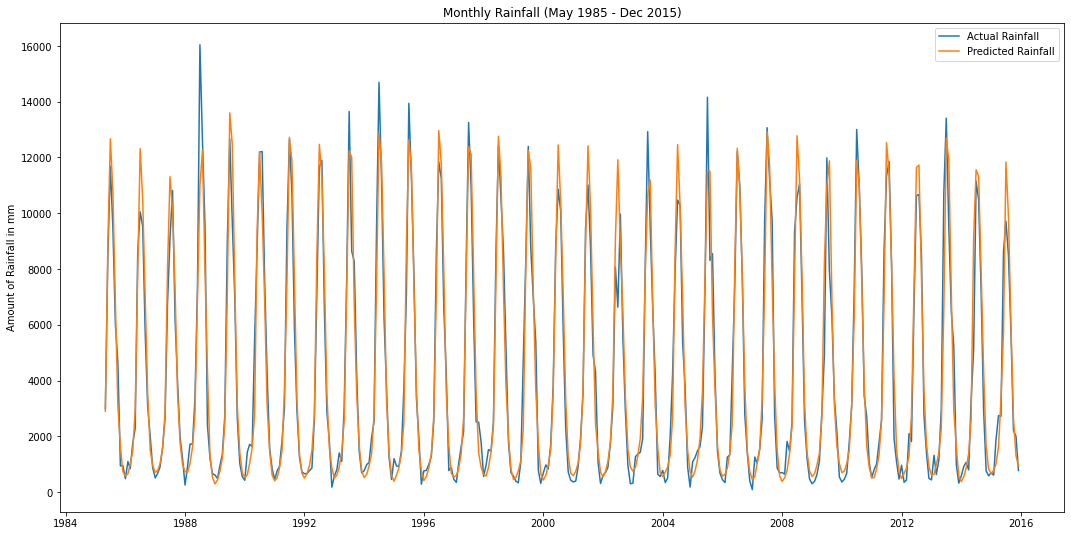

In [20]:
plt.figure(figsize=(18, 9))
plt.plot(data_table)
plt.title('Monthly Rainfall (May 1985 - Dec 2015)')
plt.ylabel('Amount of Rainfall in mm')
plt.legend(['Actual Rainfall','Predicted Rainfall'])

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))*100
mean_absolute_percentage_error(actual_data,predict_data)

31.654162635041004

In [24]:
def LSTM_Prediction(no_of_consecutive_months_as_input, no_of_units_in_LSTM_layer):
  generator = TimeseriesGenerator(sc_train_data, sc_train_data, length = no_of_consecutive_months_as_input, batch_size = 1)
  lstm_model = Sequential()
  lstm_model.add(LSTM(no_of_units_in_LSTM_layer, activation='relu', input_shape=(no_of_consecutive_months_as_input, 1)))
  lstm_model.add(Dense(1))
  lstm_model.compile(optimizer='adam', loss='mse')
  lstm_model.fit_generator(generator,epochs=10,verbose=0)
  output_generator = TimeseriesGenerator(sc_test_data, sc_test_data, length = no_of_consecutive_months_as_input, batch_size = 1)
  sc_predictions = lstm_model.predict_generator(output_generator)
  predictions = scaler.inverse_transform(sc_predictions)
  actual_data = test_data[no_of_consecutive_months_as_input:]
  predict_data = pd.DataFrame(predictions,index = actual_data.index,columns = ['Predicted'])
  mape = mean_absolute_percentage_error(actual_data,predict_data)
  return round(mape,2)

In [25]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 0, 'No of units in LSTM layer')

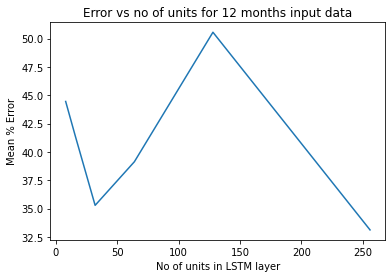

In [26]:
units = [8,16,32,64,128,256]
errors1 = []
for n in units:
  error = LSTM_Prediction(12,n)
  errors1.append(error)
plt.plot(units,errors1)
plt.title('Error vs no of units for 12 months input data')
plt.ylabel('Mean % Error')
plt.xlabel('No of units in LSTM layer')

Text(0.5, 0, 'No of consecutive months as input')

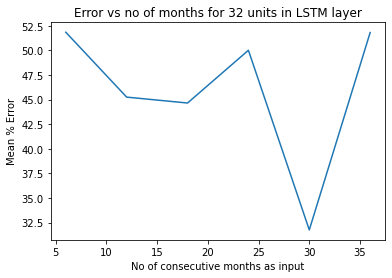

In [29]:
months = [6,12,18,24,30,36]
errors2 = []
for m in months:
  error = LSTM_Prediction(m,32)
  errors2.append(error)
plt.plot(months,errors2)
plt.title('Error vs no of months for 32 units in LSTM layer')
plt.ylabel('Mean % Error')
plt.xlabel('No of consecutive months as input')